In [ ]:
# make heatmaps for the single cell data for the given gene list and further cluster the genes in the heatmap in different conditions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from scipy.cluster import hierarchy as sch
import scipy.sparse

### For gene list C

In [10]:
# load the single cell data
adata = sc.read_h5ad("/home/jiguo/output/adata_all_cc_with_selected_gene_expression.h5")
# add a new .obs column to the adata object to indicate the condtion + cell phase
adata.obs['condition_cell_phase'] = adata.obs['condition'].astype(str) + '_' + adata.obs['phase'].astype(str)
# load the gene list
gene_list = pd.read_csv("/home/jiguo/denovo_rpe1_scrnaseq/gene_with_GO_terms_related_with_CentrosomeBiosynthesis.txt")['gene_names'].tolist()

In [11]:
# create a gene mask to filter the adata
gene_mask = adata.var['gene_name'].apply(lambda x: any(x.endswith(gene) for gene in gene_list))
c_adata = adata[:, gene_mask].copy()

In [12]:
# check which genes are not in the adata
for gene in gene_list:
    if gene not in adata.var['gene_name'].values:
        print(f"Gene {gene} not found in the adata.")

In [13]:
c_adata

AnnData object with n_obs × n_vars = 12572 × 24
    obs: 'condition', 'replicate', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'n_genes', 'S_score', 'G2M_score', 'phase', 'condition_phase', 'condition_cell_phase'
    var: 'ensembl_gene_id', 'gene_name', 'in_jakobsen', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'condition_colors', 'condition_phase_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log', 'normalised', 'regress_cc'
    obsp: 'connectivities', 'distances'

In [14]:
c_adata.X = c_adata.layers['normalised'].copy()
c_adata

AnnData object with n_obs × n_vars = 12572 × 24
    obs: 'condition', 'replicate', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'n_genes', 'S_score', 'G2M_score', 'phase', 'condition_phase', 'condition_cell_phase'
    var: 'ensembl_gene_id', 'gene_name', 'in_jakobsen', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'condition_colors', 'condition_phase_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log', 'normalised', 'regress_cc'
    obsp: 'connectivities', 'distances'

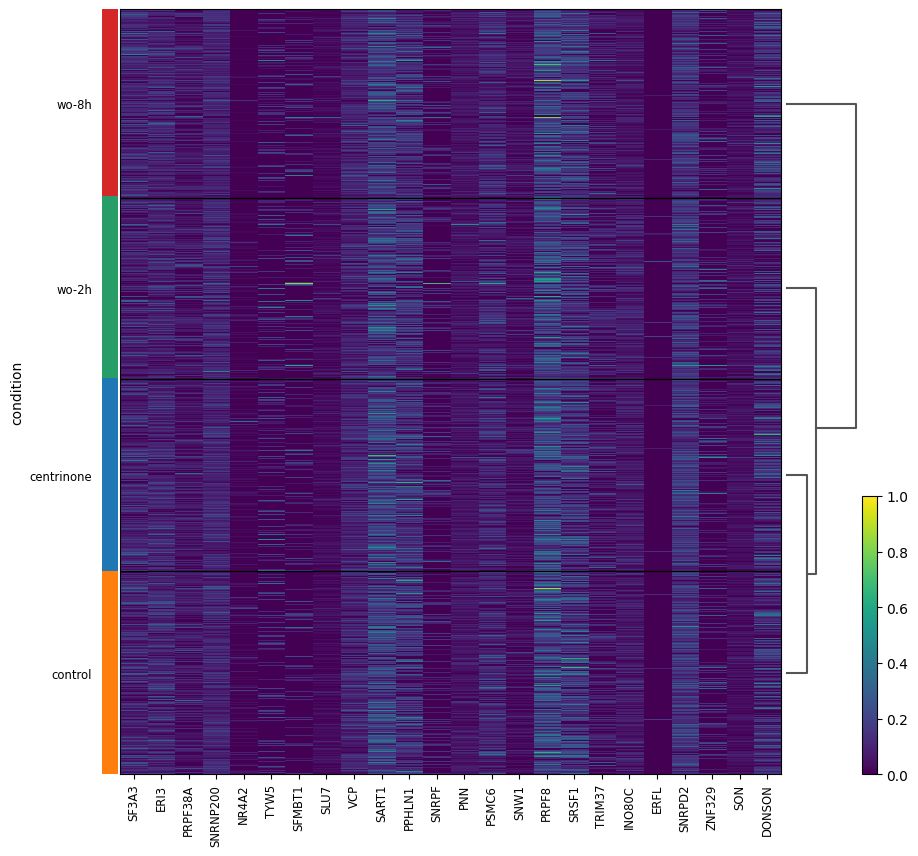

In [19]:
if scipy.sparse.issparse(c_adata.X):
    c_adata.X = c_adata.X.toarray()
plot = sc.pl.heatmap(
    c_adata,
    var_names=c_adata.var['gene_name'].values,
    groupby='condition',
    cmap='viridis',
    standard_scale='var',
    show=False,
    dendrogram=True,
    figsize=(10, 10),
)

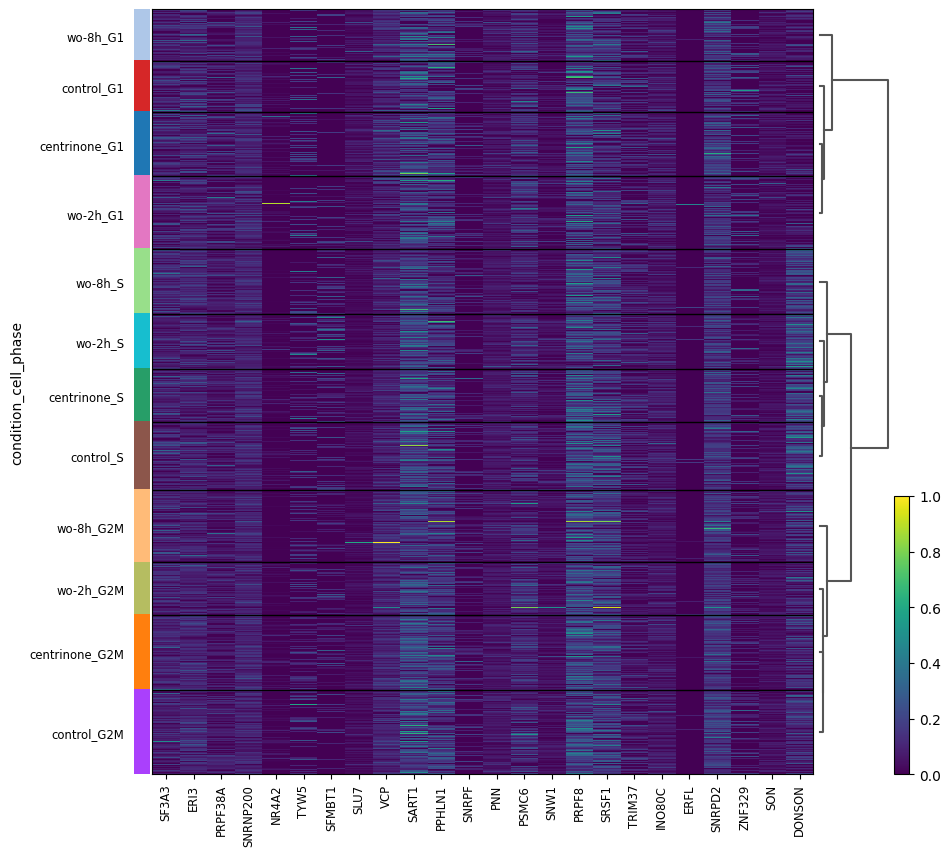

In [20]:
plot = sc.pl.heatmap(
    c_adata,
    var_names=c_adata.var['gene_name'].values,
    groupby='condition_cell_phase',
    cmap='viridis',
    standard_scale='var',
    show=False,
    dendrogram='row',
    figsize=(10, 10),
)